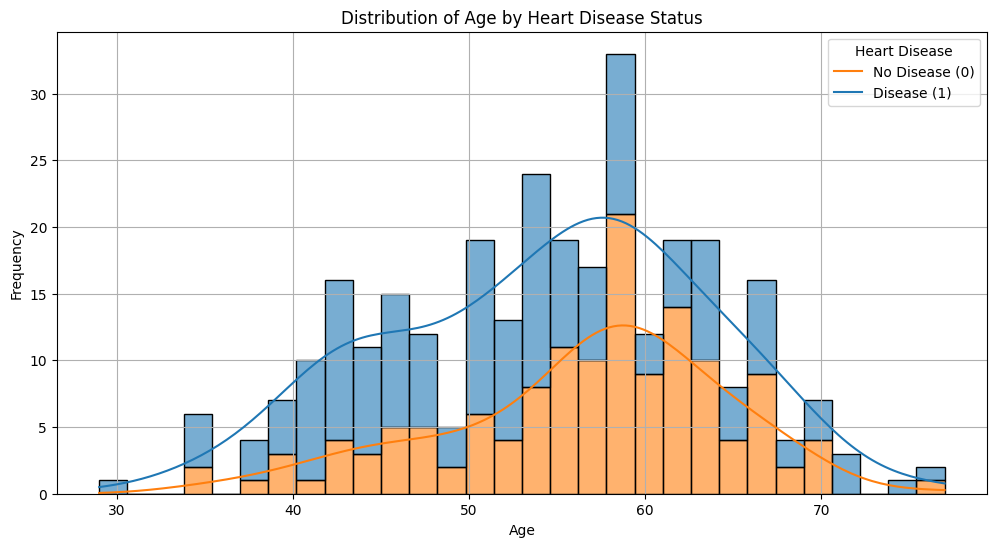

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Bài tập 1
df = pd.read_csv('cleveland.csv', header = None)
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol',
              'fbs', 'restecg', 'thalach', 'exang',
              'oldpeak', 'slope', 'ca', 'thal', 'target']
df['target'] = df.target.map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})
df['thal'] = df.thal.fillna(df.thal.mean())
df['ca'] = df.ca.fillna(df.ca.mean())

# distribution of target vs age
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='age', hue='target', multiple='stack', kde=True, bins=30, alpha=0.6)

plt.title('Distribution of Age by Heart Disease Status')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend(title='Heart Disease', labels=['No Disease (0)', 'Disease (1)'])
plt.grid(True)
plt.show()

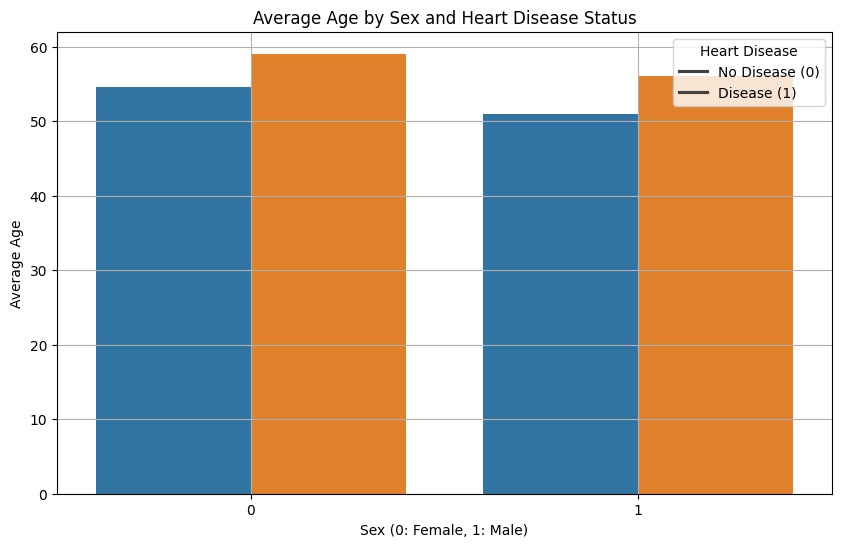

In [2]:
# bai tap 2
age_sex_target = df.groupby(['sex', 'target'])['age'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=age_sex_target, x='sex', y='age', hue='target')

plt.title('Average Age by Sex and Heart Disease Status')
plt.xlabel('Sex (0: Female, 1: Male)')
plt.ylabel('Average Age')
plt.legend(title='Heart Disease', labels=['No Disease (0)', 'Disease (1)'])
plt.grid(True)
plt.show()

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski')

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

Confusion Matrix:
[[22  7]
 [12 20]]

Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.76      0.70        29
           1       0.74      0.62      0.68        32

    accuracy                           0.69        61
   macro avg       0.69      0.69      0.69        61
weighted avg       0.70      0.69      0.69        61

Accuracy: 0.6885245901639344
